In [1]:
from sklearn import neighbors
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.sample(frac=0.65)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
6135,153,female,group C,associate's degree,free/reduced,completed,63,89,84
23145,352,female,group D,some high school,standard,none,85,95,96
12779,852,female,group C,some college,free/reduced,completed,53,74,73
6618,642,female,group C,some college,standard,none,76,79,81
29046,373,female,group E,some college,standard,completed,74,79,76
...,...,...,...,...,...,...,...,...,...
12187,250,female,group B,high school,standard,none,68,80,77
513,513,female,group B,some high school,standard,completed,54,61,62
8667,708,male,group A,bachelor's degree,standard,none,90,85,82
8392,430,male,group E,associate's degree,free/reduced,none,73,65,62


In [4]:
df['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.Gender.unique()
df.Gender = df.Gender.map({'female': 0, 'male': 1})

In [7]:
df.EthnicGroup.unique()
df.EthnicGroup = df.EthnicGroup.map({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4})

In [8]:
df.ParentEduc.unique()
df.ParentEduc = df.ParentEduc.map({"bachelor's degree": 0, 'some college': 1, "master's degree": 2,
       "associate's degree": 3, 'high school': 4, 'some high school': 5})

In [9]:
df.LunchType.unique()
df.LunchType = df.LunchType.map({'standard': 0, 'free/reduced': 1})

In [10]:
df.TestPrep.unique()
df.TestPrep = df.TestPrep.map({'none': 0, 'completed': 1})

In [11]:
df.describe()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,0.496622,2.184459,2.699618,0.350380,0.345061,66.749355,69.624980,68.468327
std,0.499997,1.138621,1.710428,0.477097,0.475396,15.206049,14.671572,15.307814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,5.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,56.000000,60.000000,58.000000
50%,0.000000,2.000000,3.000000,0.000000,0.000000,67.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,78.000000,80.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


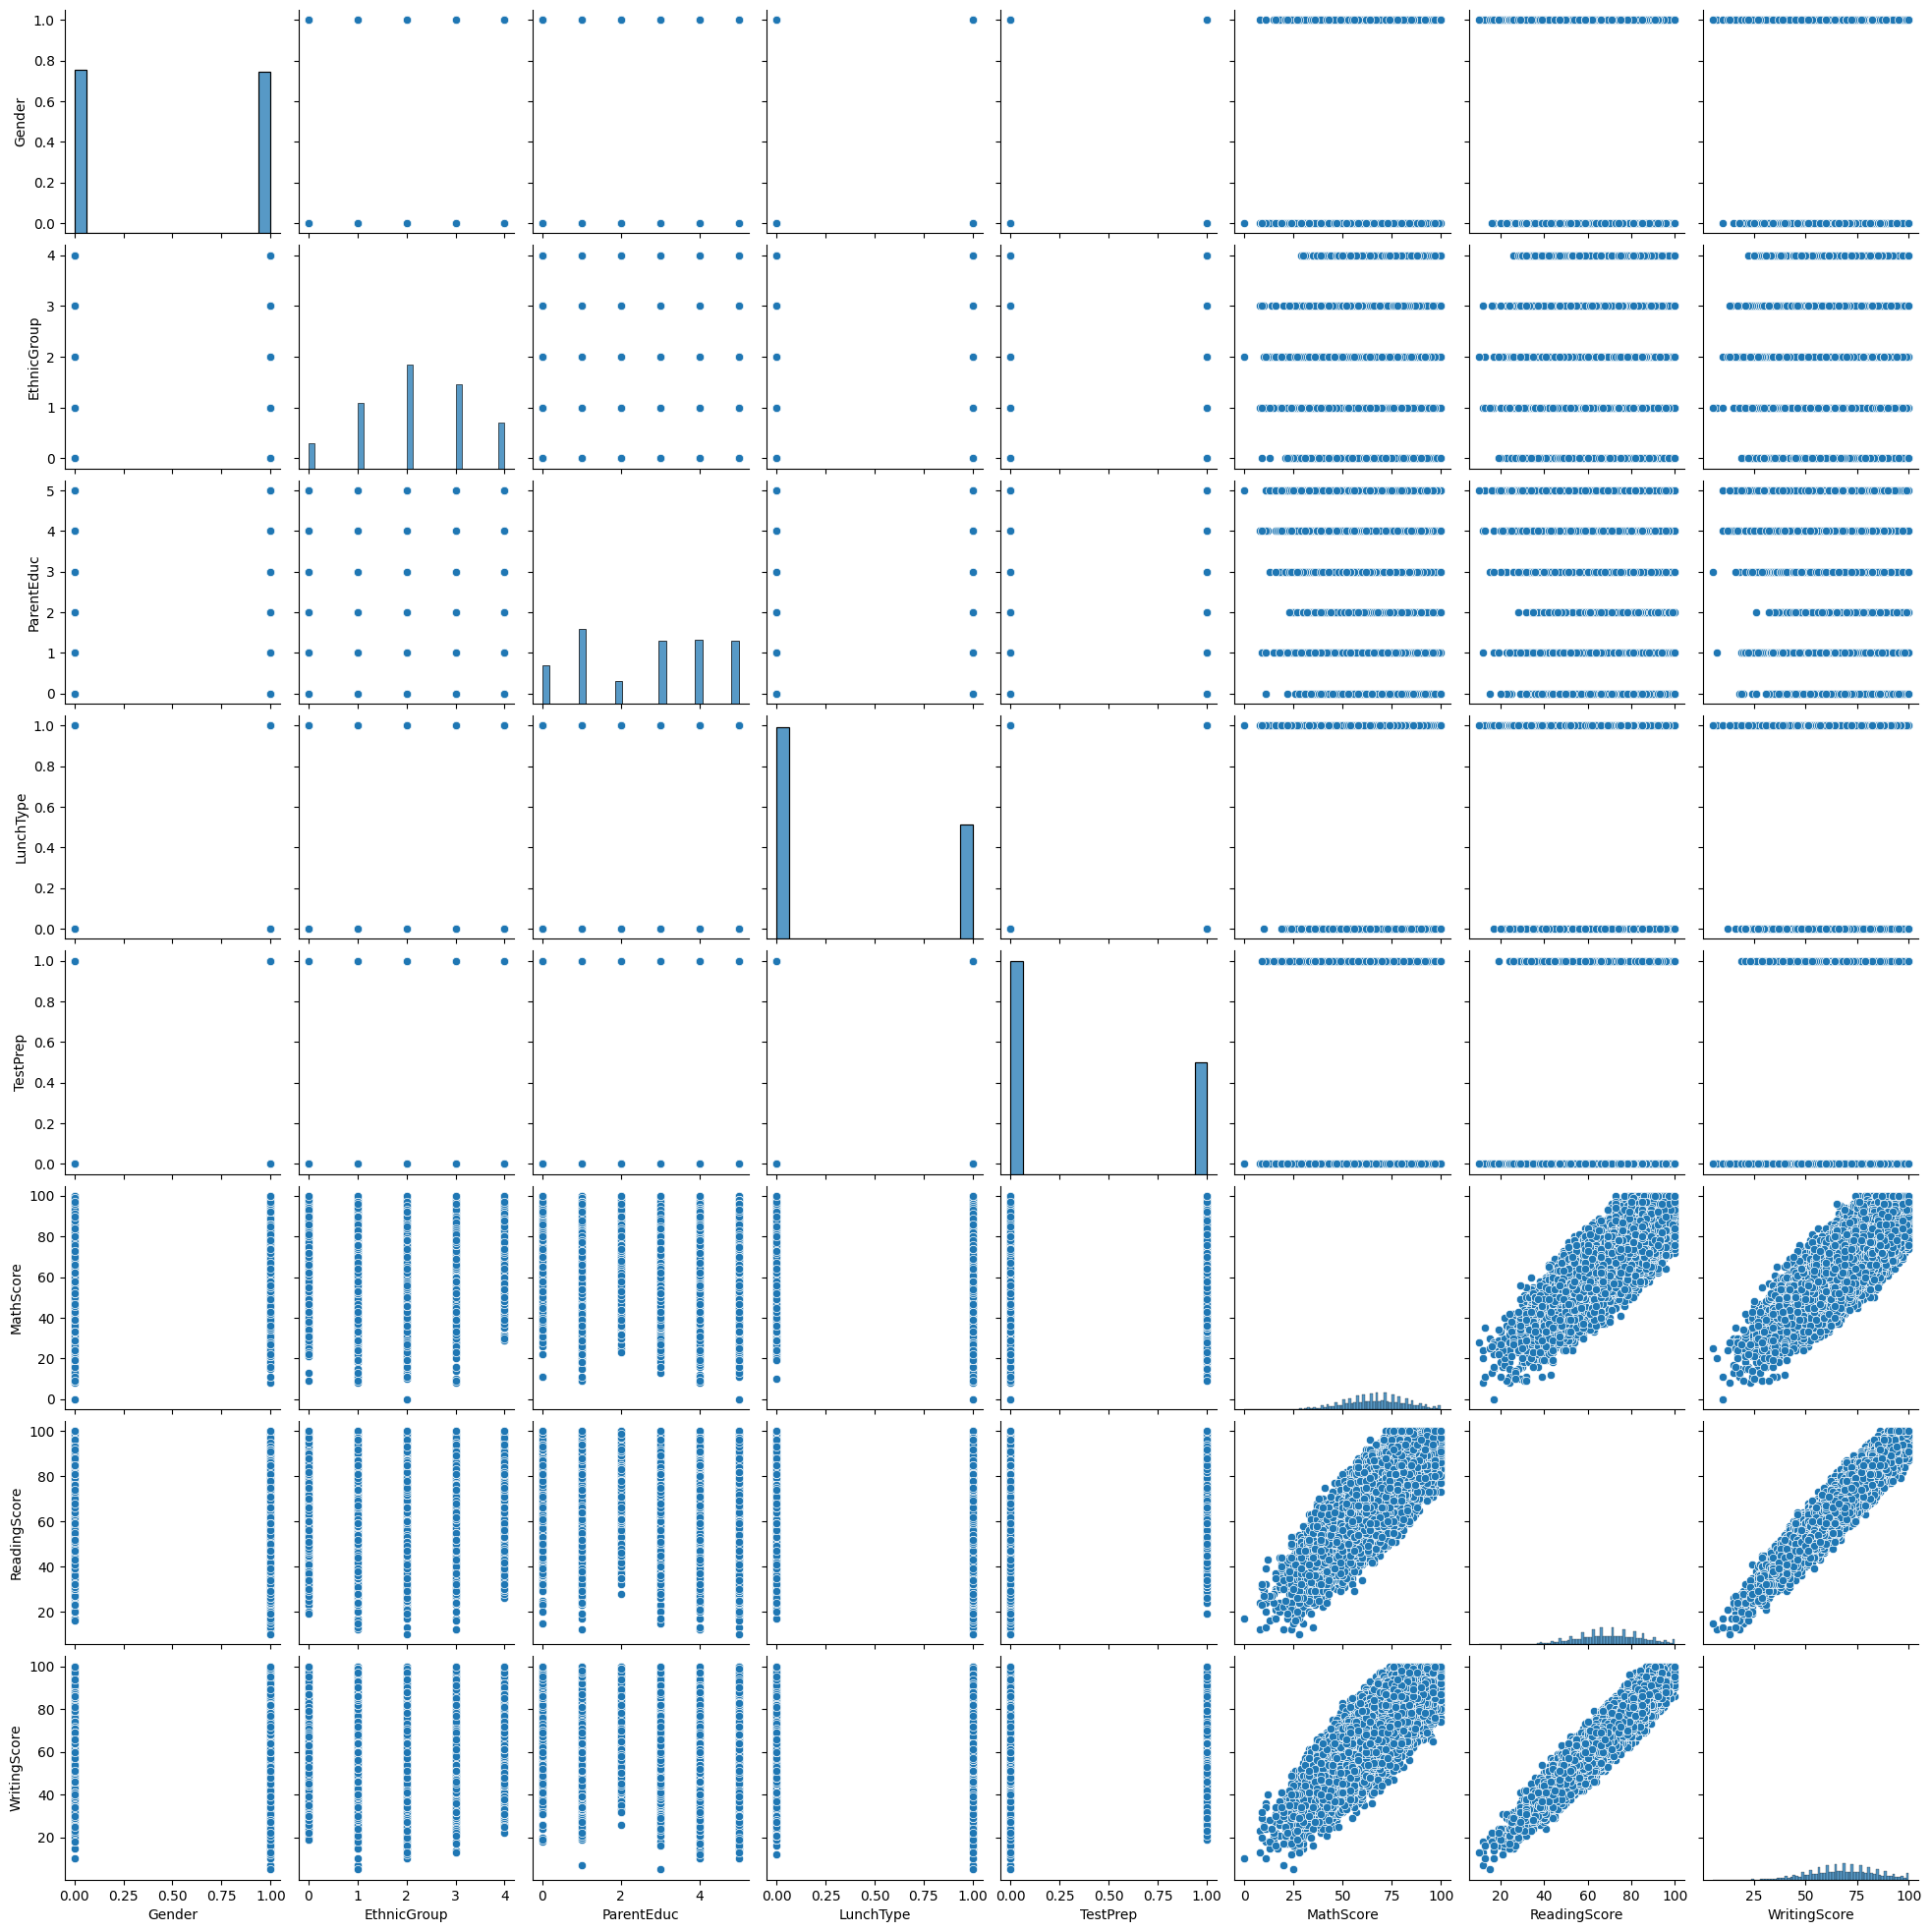

In [546]:
sb.pairplot(df)

In [12]:
# Analisis de correlacion
corr = df.corr()
corr.style.background_gradient()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
Gender,1.000000,0.002986,0.005416,0.002499,-0.005600,0.164629,-0.238039,-0.291319
EthnicGroup,0.002986,1.000000,-0.011869,0.001181,-0.002971,0.225199,0.145606,0.161272
ParentEduc,0.005416,-0.011869,1.000000,-0.000324,-0.004458,-0.137129,-0.141370,-0.178494
LunchType,0.002499,0.001181,-0.000324,1.000000,0.000206,-0.371486,-0.259599,-0.277017
TestPrep,-0.005600,-0.002971,-0.004458,0.000206,1.000000,0.143783,0.214780,0.297164
MathScore,0.164629,0.225199,-0.137129,-0.371486,0.143783,1.000000,0.817395,0.805354
ReadingScore,-0.238039,0.145606,-0.141370,-0.259599,0.214780,0.817395,1.000000,0.953095
WritingScore,-0.291319,0.161272,-0.178494,-0.277017,0.297164,0.805354,0.953095,1.000000


In [13]:
#Inicializar el modelo
k_neighbors = neighbors.KNeighborsClassifier(n_neighbors=3)

In [19]:
decission_tree = tree.DecisionTreeClassifier()

In [14]:
data_x = df.drop(['ParentEduc', 'LunchType', 'TestPrep', 'MathScore', 'WritingScore', 'ReadingScore'], axis=1)
data_y = df['ParentEduc']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

In [15]:
data_x

,Gender,EthnicGroup
0,0,1
1,0,2
2,0,1
3,1,0
4,1,2
...,...,...
30636,1,2
30637,1,4
30638,1,2
30639,1,0


In [16]:
data_y

0        0
1        1
2        2
3        3
4        1
        ..
30636    5
30637    3
30638    1
30639    5
30640    3
Name: ParentEduc, Length: 30641, dtype: int64

In [17]:
k_neighbors.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [20]:
decission_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [21]:
#Medir la precision del modelo
print(f'Score: {round(k_neighbors.score(test_x, test_y), 4) * 100}%')

Score: 16.98%


In [22]:
print(f'Score: {round(decission_tree.score(test_x, test_y), 4) * 100}%')

Score: 22.31%


In [285]:
university = 2
position = 5
labels1 = {0: 'University President', 1: 'Provost & VP Academic Affairs', 2: 'Provost & VP for Academic Affairs', 3: 'Vice President/Fin.Admin', 4: 'Vice Chancellor Academic & Student Affairs', 5: 'Chancellor'}
labels2 = {0: 'Indiana', 1: 'West Chester', 2: 'East Stroudsburg', 3: 'Slippery Rock', 4: 'Edinboro', 5: 'Millersville', 6: 'Lock Haven', 7: 'Clarion', 8: 'Kutztown', 9: 'Bloomsburg', 10: 'Shippensburg', 11: 'Cheyney', 12: 'California', 13: 'Office of the Chancellor', 14: 'Mansfield'}
predicted1 = k_neighbors.predict([[position]])
predicted2 = decission_tree.predict([[position]])

c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\preparcial\pre_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\preparcial\pre_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [284]:
print(f'La universidad {labels2[university]} tiene un {round(k_neighbors.score(test_x, test_y), 4) * 100}% de probabilidad de tener una {labels1[predicted1[0]]} como rector')

La universidad East Stroudsburg tiene un 100.0% de probabilidad de tener una University President como rector


In [286]:
print(f'La universidad {labels2[university]} tiene un {round(decission_tree.score(test_x, test_y), 4) * 100}% de probabilidad de tener una {labels1[predicted2[0]]} como rector')

La universidad East Stroudsburg tiene un 50.0% de probabilidad de tener una University President como rector
